## <span style="font-size: 40px;">**Assignment Task 2 - 08/10/2023**
## <span style="font-size: 30px;"> ***Name***: BHANU PRATAP REDDY, HARPREET SINGH, SAI SIVA SARMA <br> ***IDs***: 223935599, 223925166 , 223924778  <br> 
## <span style="font-size: 30px;"> ***Attempted High Distinction***: Yes

# <span style="font-size: 35px;">**Library Imports and QoL Settings**<a id='Library'></a>

In [21]:
#Importing all necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
from pylab import rcParams

#Dates
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, MonthLocator, HourLocator

#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

#Dickey fuller Test
from statsmodels.tsa.stattools import adfuller

#Autocorrelation and Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ARIMA
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

#Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing

#isolation Forest
from sklearn.ensemble import IsolationForest

# Declaring this to show graphs after inline command instead of plt.show() after every instance of plotting
%matplotlib inline

#Set the max number of rows in output cell to 50
pd.options.display.max_rows = 50


#Ignore unnecessary warnings
from warnings import filterwarnings
filterwarnings("ignore")

# <span style="font-size: 35px;">**Data Acquisition & Manipulation**<a id='ACQ'></a>

## <span style="font-size: 24px;"> **Q 1.1** <br>

• Write the function missing_values_table and use the dataframe as the input. The function
should return the information of missing values by column (only for columns which have
missing values and the returned value should be the count of rows has missing values);<br>

• For columns which have missing values, could you impute the missing values with the
mean value of the particular columns? (if you think it could not be done with mean value,
write down the reason in comments and report rather than code)

In [22]:
#Intialising the dataframe
item_category_df = pd.read_csv("D:\Visual Studio Projects\Python\Deakin\SIG 742 - Modern Data Science\Assesment 2\item_listing_category.csv")
item_category_df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...
...,...,...,...,...,...,...,...,...
355803,760377,Beats By Dre Solo White,3,"Electronics/TV, Audio & Surveillance/Headphones",Beats,45.0,1,beats dre solo white gently used work great
355804,780889,4 New Leap Frog Leapster Learning Games,1,Kids/Toys/Learning & Education,Leap Frog,9.0,1,viewing 4 new leap frog leapster learning game...
355805,650579,Torrid bra size 42ddd,3,Women/Underwear/Bras,Torrid,20.0,1,couple places lace snagged tell fairly good co...
355806,481154,Vans shoes,2,Men/Shoes/Fashion Sneakers,VANS,23.0,0,size 11


In [23]:
#Deriving Missing Data info
def missing_values_table(df):
    # Convert to dataframe
    table_df = pd.DataFrame(df.isnull().sum())
    
    # Rename the column to 'Missing Count'
    table_df.columns = ['Missing Count']
    
    #Drop teh colusmn that have no missing values
    table_df.drop(table_df[table_df['Missing Count'] == 0].index,inplace=True)

    #Rename index
    table_df.index.name = 'Variable Value'

    # Calculate percentage Misssing
    table_df['Percentage Misssing'] = (table_df['Missing Count'] / table_df['Missing Count'].sum()) * 100
    
    return table_df

mis_val = missing_values_table(item_category_df)
mis_val

,Missing Count,Percentage Misssing
Variable Value,,
category_name,1539,1.001373
brand_name,151956,98.872398
clean_description,194,0.126229


In [24]:
item_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


**All of the columns that have missing values are of 'object' type meaning they are not numerical in nature and hence their mean value cannot be computed.** <br>
**However varaibles 'category_name' and 'brand_name' do have repitative values and we can impute their missing valuse with the mode value.**

## <span style="font-size: 24px;"> **Q 1.2** <br>

Find the price information from the data:<br>
• Write code to print the median price of the items in the data;<br>
• What is the 90th percentile value on the price;<br>
• Draw the histogram chart for the price of the items in the data with 50 bins.

In [25]:
#Group by the column interested in and the corresponding metrics
median_df = item_category_df.groupby('name').median()
#Drop columns not interested in
cols_to_be_dropped = median_df.columns.drop('price')
median_df.drop(median_df[cols_to_be_dropped],axis=1,inplace=True)
#Rename the columns to match teh operations
median_df.rename(columns = {'price':'Median Price'}, inplace = True)

In [26]:
#Group by the column interested in and the corresponding metrics
quant_df = item_category_df.groupby('name').quantile(.90)
#Drop columns not interested in
cols_to_be_dropped = quant_df.columns.drop('price')
quant_df.drop(quant_df[cols_to_be_dropped],axis=1,inplace=True)
#Rename the columns to match teh operations
quant_df.rename(columns = {'price':'Price 90th perc'}, inplace = True)

In [27]:
price_info = pd.merge(median_df, quant_df, how ='inner', on ='name')
price_info.head()

,Median Price,Price 90th perc
name,,
! 3 girls t shirts,10.0,10.0
! HOLD ! Distressed Jeans/ Shorts Bundle,75.0,75.0
! Labor Day Weekend Sale!Band thumb ring,5.0,5.0
! Price drop! Thirty one cinch sack,11.0,11.0
! Price lowered! Target brand boots,14.0,14.0


**Also Add median price and 90% quantile for all since question is ambigious**

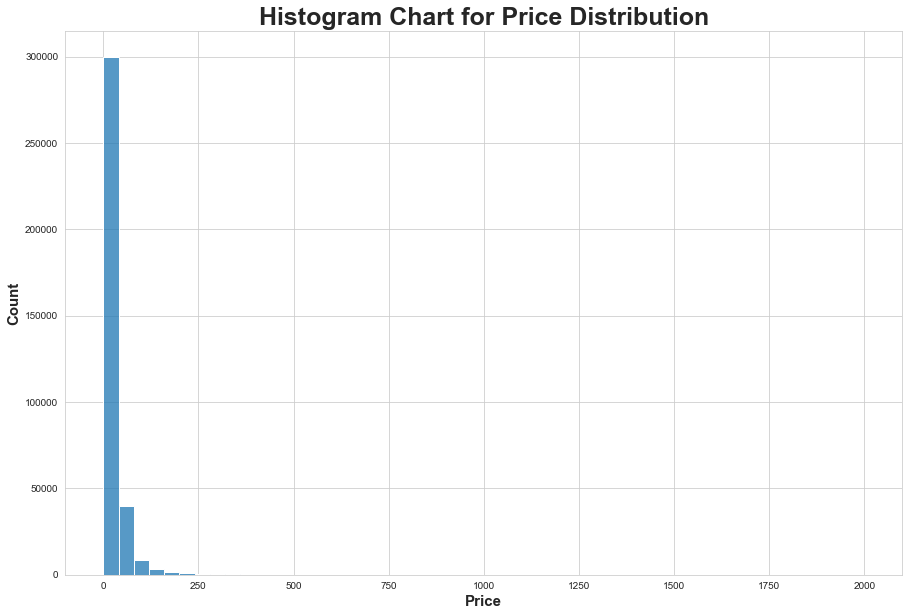

In [28]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(15,10))
plt.title("Histogram Chart for Price Distribution",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.set_style("whitegrid")

#Plot the graph using seabont countplot and specify where data values must appear
ax = sns.histplot(data= item_category_df, x= "price",bins=50);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xlabel("Price",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");

## <span style="font-size: 24px;"> **Q 1.3** <br>

Exploring the shipping information from the data: <br><br>
• Write code to find out the percentage of the items that are paid by the buyers.<br><br>
• Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer
pays shipping (50 bins).<br><br>
• When buying the items online, do you need to pay higher price if seller pays for the
shipping? <br>Write the code to find out (Compare the median price of items paid by buyers
and items paid by sellers, and explain the result in the comment and report).<br><br>
(Optional: You could use the subplot from EDA)<br>

**Since its not explicitly said for the purposes of this excercise we shall assume shipping = 0 as paid by the buyers**

In [29]:
# Convert to dataframe
shipping_info = pd.DataFrame(item_category_df['shipping'].value_counts())

# Rename the column to 'Count'
shipping_info.columns = ['Count']

#Rename index
shipping_info.index.name = 'Shipping Value'

# Calculate percentage Misssing
shipping_info['Percentage'] = (shipping_info['Count'] / shipping_info['Count'].sum()) * 100
shipping_info

,Count,Percentage
Shipping Value,,
0,197064,55.384927
1,158744,44.615073


In [30]:
df_buyer_pays = item_category_df[item_category_df['shipping'] == 0]
df_seller_pays = item_category_df[item_category_df['shipping'] == 1]

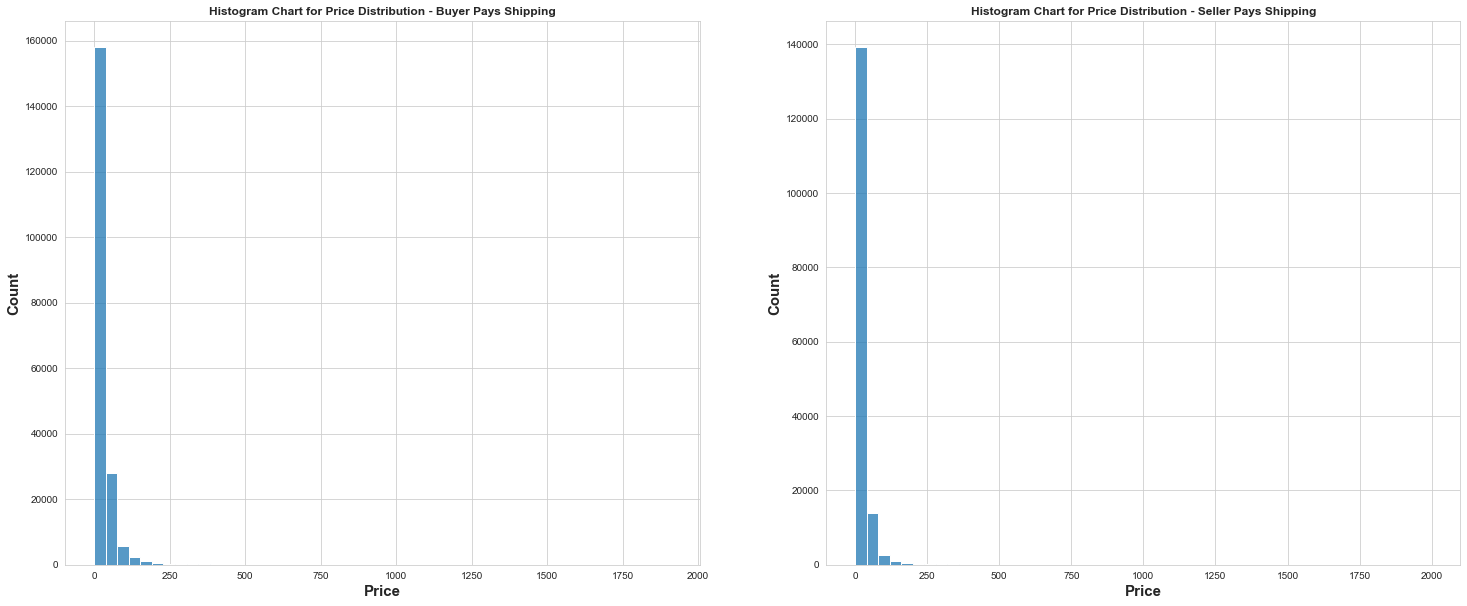

In [31]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(25,10))
plt.subplot(1,2,1);
plt.title("Histogram Chart for Price Distribution - Buyer Pays Shipping",fontsize=12, weight="bold")

#Remove outer border and set grid style 
sns.set_style("whitegrid")

#Plot the graph using seaborn countplot and specify where data values must appear
ax = sns.histplot(data= df_buyer_pays, x= "price",bins=50);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xlabel("Price",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");

plt.subplot(1,2,2);
plt.title("Histogram Chart for Price Distribution - Seller Pays Shipping",fontsize=12, weight="bold")

#Remove outer border and set grid style 
sns.set_style("whitegrid")

#Plot the graph using seaborn countplot and specify where data values must appear
ax = sns.histplot(data= df_seller_pays, x= "price",bins=50);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xlabel("Price",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");

In [32]:
buy_sell_median_df = item_category_df.groupby('shipping').median()
cols_to_be_dropped = buy_sell_median_df.columns.drop('price')
buy_sell_median_df.drop(buy_sell_median_df[cols_to_be_dropped],axis=1,inplace=True)
buy_sell_median_df.rename(columns = {'price':'Median Price'}, inplace = True)
buy_sell_median_df

,Median Price
shipping,
0,19.0
1,14.0


## <span style="font-size: 24px;"> **Q 1.4** <br>

You are required to find out the item condition information from the data. Lower the number
(value), the better condition of the item.<br><br>
• Write the code to find out (print) the count of the rows on each number (value) in column
item_condition_id.<br>
• Draw the boxplot graphs (one plot) on the price for each item condition value, and find out<br>
out whether the better condition of the item could have higher median price (draw the plot<br>
and answer this question in the comment and report).

In [33]:
# Convert to dataframe
condition_info = pd.DataFrame(item_category_df['item_condition_id'].value_counts())

# Rename the column to 'Count of rows'
condition_info.columns = ['Count of rows']

#Rename index
condition_info.index.name = 'Condition Info'

# Calculate percentage Misssing
condition_info['Percentage'] = (condition_info['Count of rows'] / condition_info['Count of rows'].sum()) * 100
condition_info

,Count of rows,Percentage
Condition Info,,
1,153402,43.113702
3,104248,29.298948
2,89843,25.250416
4,7768,2.183200
5,547,0.153735


**Need to convert Condition to acategorical type before we continue**

In [34]:
item_category_df['item_condition_id'] = item_category_df['item_condition_id'].astype('category')

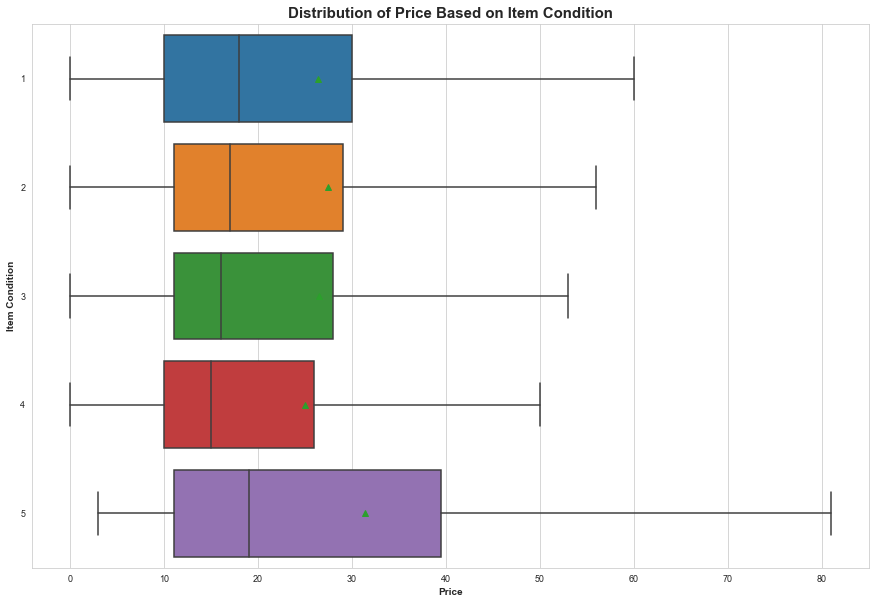

In [35]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(15,10))
plt.title("Distribution of Price Based on Item Condition",fontsize=15, weight="bold")

#Remove outer border and set grid style 
sns.set_style("whitegrid")

#Plot both the boxplots without outliers
ax = sns.boxplot(data= item_category_df, x="price", y="item_condition_id", showmeans=True, showfliers=False)

#Label the axes 
plt.xlabel("Price",fontsize=10, weight="bold");
plt.ylabel("Item Condition",fontsize=10, weight="bold");
ax.tick_params(labelsize = 9)

## <span style="font-size: 24px;"> **Q 1.5** <br>

Conduct the category analysis and find out the relevant information:<br><br>
• Write the code to find out (print) how many unique categories you could find from column
category_name.<br>
• For the items with worst condition only (highest value from item_condition_id), write code<br>
to (print) find out the top 3 categories (now you probably understand the findings you had<br>
in Question 1.4).


In [36]:
# Convert to dataframe
unique_categories = pd.DataFrame(item_category_df['category_name'].value_counts())

# Rename the column to 'Count of rows'
unique_categories.columns = ['Count of rows']

#Rename index
unique_categories.index.name = 'Category'

# Calculate percentage Misssing
unique_categories['Percentage'] = (unique_categories['Count of rows'] / unique_categories['Count of rows'].sum()) * 100
unique_categories

,Count of rows,Percentage
Category,,
"Women/Athletic Apparel/Pants, Tights, Leggings",14336,4.046643
Women/Tops & Blouses/T-Shirts,11187,3.157770
Beauty/Makeup/Face,8234,2.324223
Beauty/Makeup/Lips,7188,2.028967
Electronics/Video Games & Consoles/Games,6391,1.803996
...,...,...
Handmade/Patterns/Handmade,1,0.000282
Vintage & Collectibles/Serving/Glassware,1,0.000282
Handmade/Clothing/Dress,1,0.000282


In [37]:
print(f'The total No. of Unique Categories are {len(unique_categories)}')

The total No. of Unique Categories are 1135


In [38]:
#initialise dataframe containing entries of only the worst Item Coinditions
worst_item_condition_df = item_category_df[item_category_df['item_condition_id'] == 5]

# Convert to dataframe
worst_unique_categories = pd.DataFrame(worst_item_condition_df['category_name'].value_counts())

# Rename the column to 'Count of rows'
worst_unique_categories.columns = ['Count of rows']

#Rename index
worst_unique_categories.index.name = 'Category'

# Calculate percentage Misssing
worst_unique_categories['Percentage'] = (worst_unique_categories['Count of rows'] / worst_unique_categories['Count of rows'].sum()) * 100
worst_unique_categories

,Count of rows,Percentage
Category,,
Electronics/Cell Phones & Accessories/Cell Phones & Smartphones,137,25.137615
Electronics/Video Games & Consoles/Games,42,7.706422
Electronics/Video Games & Consoles/Consoles,35,6.422018
Men/Shoes/Athletic,22,4.036697
Electronics/Computers & Tablets/Laptops & Netbooks,21,3.853211
...,...,...
Electronics/Computers & Tablets/Desktops & All-In-Ones,1,0.183486
Other/Books/Education & Teaching,1,0.183486
Vintage & Collectibles/Toy/Car,1,0.183486


**The top Item categories with worst condition are Electronics and this explains why in 1.4 teh items with the worst condition had the haighest median price, since electronics are naturally priced higher than most other categories.**

## <span style="font-size: 24px;"> **Q 1.6** <br>

The categories in column category_name have 3 parts. The three parts (main_cat,subcat_1 and
subcat_2) are concatenated with ’/’ character sequentially in the data now.<br><br>
• Write the function (must be function) to split the text content (string value in each row) in<br>
column category_name by ’/’ character. you need to handle the exception in the function<br>
for those has missing values (NaN). For missing values (NaN), the results from splitting<br>
should be ”Category Unknown”, ”Category Unknown”, ”Category Unknown”.<br><br>
• Use the above function you wrote to create three new columns main_cat,subcat_1 and<br>
subcat_2 with corresponding values from the result of splitting. Print out the dataframe to<br>
show the top 5 rows for three new columns main_cat,subcat_1 and subcat_2<br>

In [39]:
def split_col(df,colname,marker):
    #initialise temp dataframe with the desired new columns
    temp_df = df
    temp_df.insert(loc = 3,column = 'main_cat',value = '')
    temp_df.insert(loc = 4,column = 'sub_cat_1',value = '')
    temp_df.insert(loc = 5,column = 'sub_cat_2',value = '')
    
    #Iterate Over the rows and seperate the cateogry and place it 
    df_len = len(temp_df)
    for i in tqdm(range(df_len)):
        try:
            temp_var = df[colname][i].split(marker)
            temp_df['main_cat'][i] = temp_var[0]
            temp_df['sub_cat_1'][i] = temp_var[1]
            temp_df['sub_cat_2'][i] = temp_var[2]
            
        except AttributeError:
            temp_df['main_cat'][i] = "Category Unknown"
            temp_df['sub_cat_1'][i] = "Category Unknown"
            temp_df['sub_cat_2'][i] = "Category Unknown"
    
    temp_df.drop(colname,axis=1,inplace=True)        
    return temp_df 

In [40]:
item_category_df = split_col(df=item_category_df,colname='category_name',marker='/')
item_category_df.head()

100%|██████████| 355808/355808 [00:55<00:00, 6458.46it/s]


,train_id,name,item_condition_id,main_cat,sub_cat_1,sub_cat_2,brand_name,price,shipping,clean_description
0,128037,Bundle for Sassy Sisters,3,Women,Tops & Blouses,Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...
1,491755,PINK VS TANK,2,Women,Tops & Blouses,"Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn
2,470924,Funko Pop Unmasked Cyclops,1,Kids,Toys,Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...
3,491263,Baby Roshe Runs,3,Kids,Boys 2T-5T,Shoes,Nike,19.0,0,baby black nike roshe runs size 5c
4,836489,Baby Girl Ralph Lauren dresses,3,Kids,Girls 0-24 Mos,Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...


## <span style="font-size: 24px;"> **Q 1.7** <br>

After splitting the category for column category_name, we now have the three main details<br>
regarding to the category information. However, we need to clean the text in each of the new<br>
three columns in lowercase.<br><br>
• Write code (or function) to change the text (value in each row) from the new three columns<br>
to lowercase.<br><br>
• Draw the bar chart to find out the top 5 most popular main categories (in column main_cat)<br>
in the data (only showing the top 5).<br><br>
• Write code (or function) to (print) find out how many unique main categories (in column<br>
main_cat), unique first sub-categories (in column subcat_1) and unique second<br>
sub-categories (in column subcat_2) respectively.

In [41]:
item_category_df['main_cat'] = item_category_df['main_cat'].str.lower()
item_category_df['sub_cat_1'] = item_category_df['sub_cat_1'].str.lower()
item_category_df['sub_cat_2'] = item_category_df['sub_cat_2'].str.lower()
item_category_df

,train_id,name,item_condition_id,main_cat,sub_cat_1,sub_cat_2,brand_name,price,shipping,clean_description
0,128037,Bundle for Sassy Sisters,3,women,tops & blouses,blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...
1,491755,PINK VS TANK,2,women,tops & blouses,"tank, cami",NaN,17.0,0,sequin pink sign sequins missing gently worn
2,470924,Funko Pop Unmasked Cyclops,1,kids,toys,action figures & statues,Funko,30.0,1,box great condition comes soft pop protector p...
3,491263,Baby Roshe Runs,3,kids,boys 2t-5t,shoes,Nike,19.0,0,baby black nike roshe runs size 5c
4,836489,Baby Girl Ralph Lauren dresses,3,kids,girls 0-24 mos,dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...
...,...,...,...,...,...,...,...,...,...,...
355803,760377,Beats By Dre Solo White,3,electronics,"tv, audio & surveillance",headphones,Beats,45.0,1,beats dre solo white gently used work great
355804,780889,4 New Leap Frog Leapster Learning Games,1,kids,toys,learning & education,Leap Frog,9.0,1,viewing 4 new leap frog leapster learning game...
355805,650579,Torrid bra size 42ddd,3,women,underwear,bras,Torrid,20.0,1,couple places lace snagged tell fairly good co...
355806,481154,Vans shoes,2,men,shoes,fashion sneakers,VANS,23.0,0,size 11


In [42]:
# Convert to dataframe
main_cat_count = pd.DataFrame(item_category_df['main_cat'].value_counts())

# Rename the column to 'Count of rows'
main_cat_count.columns = ['Count of rows']

#Rename index
main_cat_count.index.name = 'Category'

# Calculate percentage Misssing
main_cat_count['Percentage'] = (main_cat_count['Count of rows'] / main_cat_count['Count of rows'].sum()) * 100
main_cat_count

,Count of rows,Percentage
Category,,
women,159497,44.826704
beauty,49790,13.993502
kids,41146,11.564102
electronics,29172,8.198804
men,22582,6.346681
home,16272,4.573253
vintage & collectibles,11207,3.149732
other,10958,3.079751
handmade,7520,2.113499


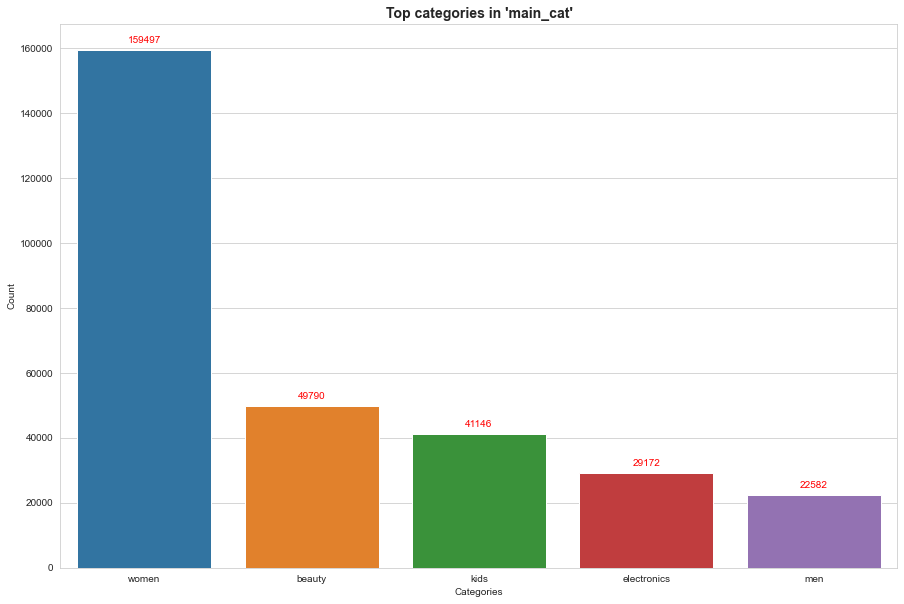

In [43]:
# plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
plt.figure(figsize =(15, 10))
plt.title("Top categories in 'main_cat'",fontsize=14, weight="bold")
sns.set_style("whitegrid")
ax = sns.barplot(x = main_cat_count.index[0:5], y = main_cat_count["Count of rows"][0:5])


plt.ylabel("Count", fontsize =10)
plt.xlabel('Categories', fontsize = 10)
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 10,padding =5);

In [44]:
# Convert to dataframe
sub_cat_1_count = pd.DataFrame(item_category_df['sub_cat_1'].value_counts())

# Rename the column to 'Count of rows'
sub_cat_1_count.columns = ['Count of rows']

#Rename index
sub_cat_1_count.index.name = 'Category'

# Calculate percentage Misssing
sub_cat_1_count['Percentage'] = (sub_cat_1_count['Count of rows'] / sub_cat_1_count['Count of rows'].sum()) * 100
sub_cat_1_count

,Count of rows,Percentage
Category,,
athletic apparel,32185,9.045609
makeup,29917,8.408186
tops & blouses,25666,7.213441
shoes,24138,6.783996
jewelry,14798,4.158985
...,...,...
suits,13,0.003654
quilts,10,0.002811
ceramics and pottery,10,0.002811


In [45]:
# Convert to dataframe
sub_cat_2_count = pd.DataFrame(item_category_df['sub_cat_2'].value_counts())

# Rename the column to 'Count of rows'
sub_cat_2_count.columns = ['Count of rows']

#Rename index
sub_cat_2_count.index.name = 'Category'

# Calculate percentage Misssing
sub_cat_2_count['Percentage'] = (sub_cat_2_count['Count of rows'] / sub_cat_2_count['Count of rows'].sum()) * 100
sub_cat_2_count

,Count of rows,Percentage
Category,,
t-shirts,14768,4.150553
"pants, tights, leggings",14336,4.029139
other,12017,3.377383
face,11962,3.361926
shoes,7647,2.149193
...,...,...
storage cabinets,1,0.000281
chain,1,0.000281
bass guitars,1,0.000281


In [46]:
print(f'The Number of Unique categories in "main_cat": {len(main_cat_count)}')
print(f'The Number of Unique categories in "sub_cat_1": {len(sub_cat_1_count)}')
print(f'The Number of Unique categories in "sub_cat_2": {len(sub_cat_2_count)}')

The Number of Unique categories in "main_cat": 11
The Number of Unique categories in "sub_cat_1": 114
The Number of Unique categories in "sub_cat_2": 788


## <span style="font-size: 24px;"> **Q 1.8** <br>

Exploring the price and categories.<br><br>
• Write code to (print) find out the median price for all the categories in new column main_cat.<br>
• Draw the bar chart to find out the top 10 most expensive first sub-categories (in column<br>
subcat_1) in the data.<br>
• Draw the bar chart to find out the top 10 cheapest second sub-categories (in column<br>
subcat_2) in the data.


In [47]:
#Group by the column interested in and the corresponding metrics
median_main_cat_df = item_category_df.groupby('main_cat').median()
#Drop columns not interested in
cols_to_be_dropped = median_main_cat_df.columns.drop('price')
median_main_cat_df.drop(median_main_cat_df[cols_to_be_dropped],axis=1,inplace=True)
#Rename the columns to match the operations
median_main_cat_df.rename(columns = {'price':'Median Price'}, inplace = True)
median_main_cat_df

,Median Price
main_cat,
beauty,15.0
category unknown,18.0
electronics,15.0
handmade,12.0
home,18.0
kids,14.0
men,21.0
other,14.0
sports & outdoors,16.0


In [48]:
#Group by the column interested in and the corresponding metrics
most_expns_sub_cat_1_df = item_category_df.groupby('sub_cat_1').median()
#Drop columns not interested in
cols_to_be_dropped = most_expns_sub_cat_1_df.columns.drop('price')
most_expns_sub_cat_1_df.drop(most_expns_sub_cat_1_df[cols_to_be_dropped],axis=1,inplace=True)
#Rename the columns to match teh operations
most_expns_sub_cat_1_df.rename(columns = {'price':'Median Price'}, inplace = True)
# sort the dataframe in descending order
most_expns_sub_cat_1_df = most_expns_sub_cat_1_df.sort_values('Median Price', ascending = False)
most_expns_sub_cat_1_df

,Median Price
sub_cat_1,
cameras & photography,40.0
computers & tablets,40.0
strollers,39.5
suits,36.0
musical instruments,34.0
...,...
children,9.0
art,8.5
trading cards,8.0


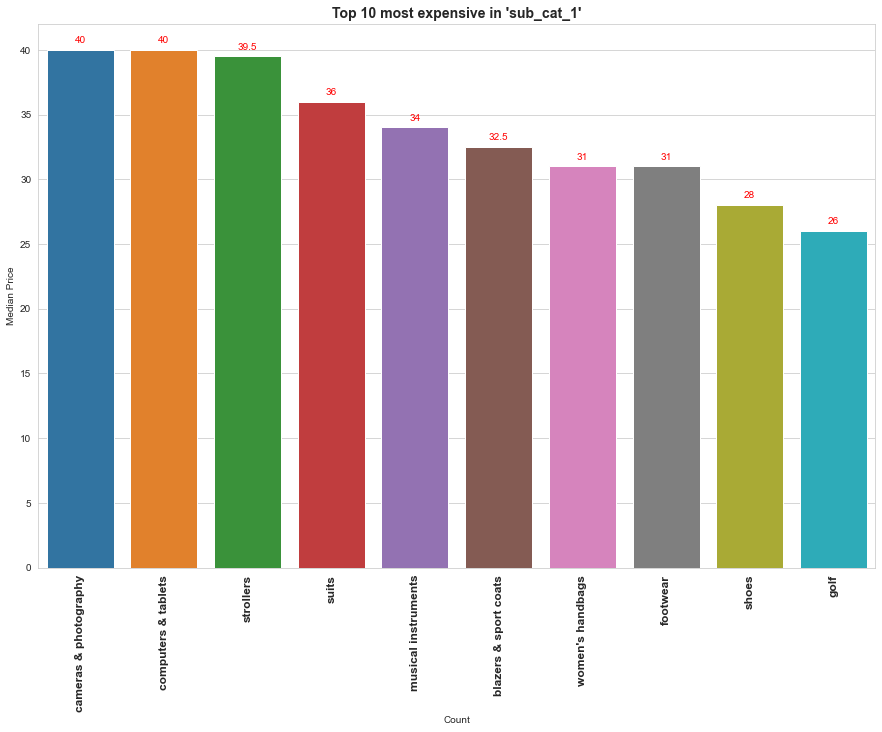

In [49]:
# plot a bar plot with count on the y-axis and Variable names on x-axis
plt.figure(figsize =(15, 10))
plt.title("Top 10 most expensive in 'sub_cat_1'",fontsize=14, weight="bold")
sns.set_style("whitegrid")
ax = sns.barplot(x = most_expns_sub_cat_1_df.index[0:10], y = most_expns_sub_cat_1_df["Median Price"][0:10])


plt.xlabel("Count", fontsize =10)
plt.ylabel('Median Price', fontsize = 10)
plt.xticks(rotation = 90,fontsize=12, weight="bold")
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 10,padding =5);

In [50]:
#Group by the column interested in and the corresponding metrics
cheapest_sub_cat_2_df = item_category_df.groupby('sub_cat_2').median()
#Drop columns not interested in
cols_to_be_dropped = cheapest_sub_cat_2_df.columns.drop('price')
cheapest_sub_cat_2_df.drop(cheapest_sub_cat_2_df[cols_to_be_dropped],axis=1,inplace=True)
#Rename the columns to match teh operations
cheapest_sub_cat_2_df.rename(columns = {'price':'Median Price'}, inplace = True)
# sort the dataframe in Ascending order
cheapest_sub_cat_2_df = cheapest_sub_cat_2_df.sort_values('Median Price', ascending = True)
cheapest_sub_cat_2_df

,Median Price
sub_cat_2,
"historical, military",3.0
photography,3.0
necktie,3.0
print,4.0
sticker,4.0
...,...
desktops & all-in-ones,112.5
standard,113.0
travel systems,115.0


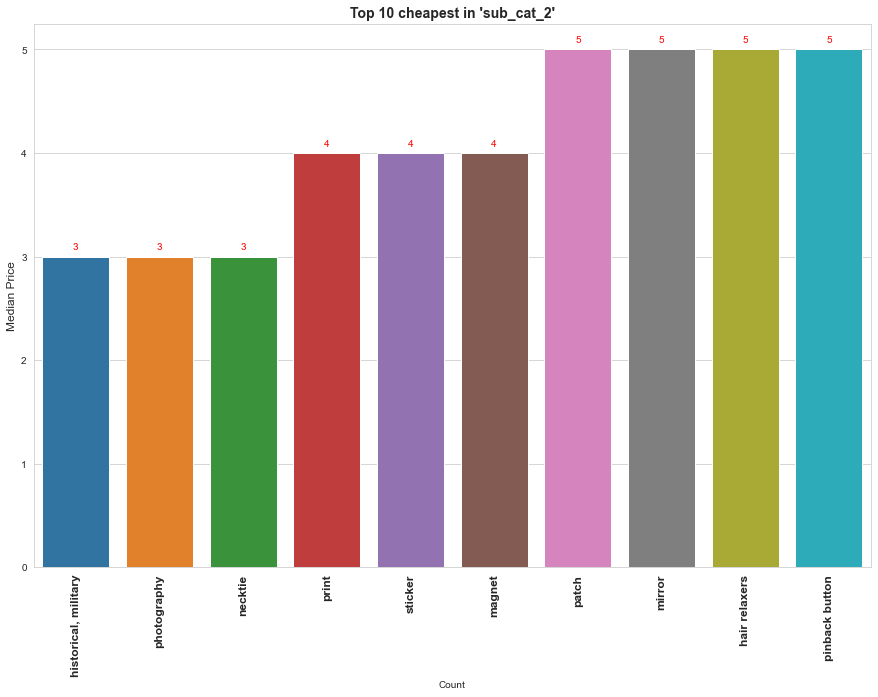

In [51]:
# plot a bar plot with count on the y-axis and Variable names on x-axis
plt.figure(figsize =(15, 10))
plt.title("Top 10 cheapest in 'sub_cat_2'",fontsize=14, weight="bold")
sns.set_style("whitegrid")
ax = sns.barplot(x = cheapest_sub_cat_2_df.index[0:10], y = cheapest_sub_cat_2_df["Median Price"][0:10])


plt.xlabel("Count", fontsize =10)
plt.ylabel('Median Price', fontsize = 12)
plt.xticks(rotation = 90,fontsize=12, weight="bold")
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 10,padding =5);

## <span style="font-size: 24px;"> **Q 1.9** <br>

Exploring the price and brand.<br><br>
• Write code to (print) find out the median price for all the brands (fill NaN with ’brand<br>
unavailable’).<br>
• Draw the bar chart to find out the top 10 most popular brands in the data.<br>

In [52]:
#replace missing values i.e. NaN with 'brand Unavailable'
item_category_df['brand_name'] = item_category_df['brand_name'].replace(np.NaN,'brand unavailable')
item_category_df

,train_id,name,item_condition_id,main_cat,sub_cat_1,sub_cat_2,brand_name,price,shipping,clean_description
0,128037,Bundle for Sassy Sisters,3,women,tops & blouses,blouse,brand unavailable,16.0,0,max cleo black dress paper crane black tank to...
1,491755,PINK VS TANK,2,women,tops & blouses,"tank, cami",brand unavailable,17.0,0,sequin pink sign sequins missing gently worn
2,470924,Funko Pop Unmasked Cyclops,1,kids,toys,action figures & statues,Funko,30.0,1,box great condition comes soft pop protector p...
3,491263,Baby Roshe Runs,3,kids,boys 2t-5t,shoes,Nike,19.0,0,baby black nike roshe runs size 5c
4,836489,Baby Girl Ralph Lauren dresses,3,kids,girls 0-24 mos,dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...
...,...,...,...,...,...,...,...,...,...,...
355803,760377,Beats By Dre Solo White,3,electronics,"tv, audio & surveillance",headphones,Beats,45.0,1,beats dre solo white gently used work great
355804,780889,4 New Leap Frog Leapster Learning Games,1,kids,toys,learning & education,Leap Frog,9.0,1,viewing 4 new leap frog leapster learning game...
355805,650579,Torrid bra size 42ddd,3,women,underwear,bras,Torrid,20.0,1,couple places lace snagged tell fairly good co...
355806,481154,Vans shoes,2,men,shoes,fashion sneakers,VANS,23.0,0,size 11


In [53]:
#Group by the column interested in and the corresponding metrics
median_brand_df = item_category_df.groupby('brand_name').median()
#Drop columns not interested in
cols_to_be_dropped = median_brand_df.columns.drop('price')
median_brand_df.drop(median_brand_df[cols_to_be_dropped],axis=1,inplace=True)
#Rename the columns to match teh operations
median_brand_df.rename(columns = {'price':'Median Price'}, inplace = True)
median_brand_df

,Median Price
brand_name,
% Pure,14.0
10.Deep,18.0
21men,10.0
3.1 Phillip Lim,232.5
3M®,15.0
...,...
timi & leslie,65.0
tokidoki,18.0
totes ISOTONER,14.0


In [54]:
# Convert to dataframe
brand_popularity = pd.DataFrame(item_category_df['brand_name'].value_counts())

# Rename the column to 'Count of rows'
brand_popularity.columns = ['Count of rows']

#Rename index
brand_popularity.index.name = 'Category'

# Calculate percentage Misssing
brand_popularity['Percentage'] = (brand_popularity['Count of rows'] / brand_popularity['Count of rows'].sum()) * 100
brand_popularity

,Count of rows,Percentage
Category,,
brand unavailable,151956,42.707303
PINK,13376,3.759331
Nike,13182,3.704807
Victoria's Secret,11544,3.244446
LuLaRoe,7272,2.043799
...,...,...
Spiderman,1,0.000281
Moon Collection,1,0.000281
Ralph Lauren Collection,1,0.000281


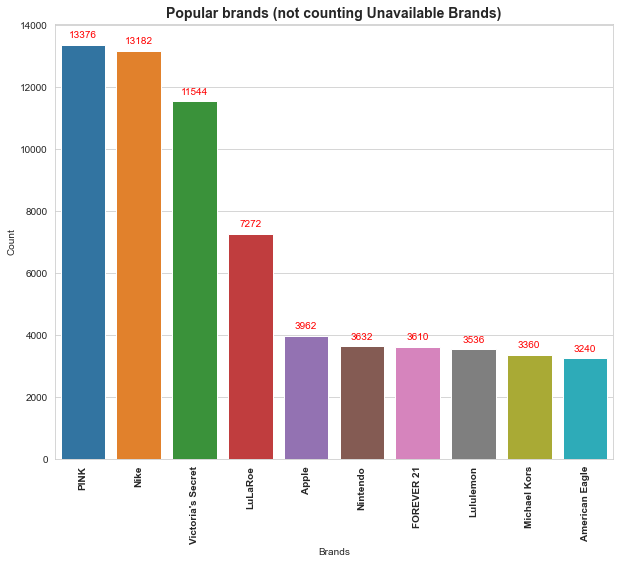

In [55]:
# plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
plt.figure(figsize =(10, 8))
plt.title("Popular brands (not counting Unavailable Brands)",fontsize=14, weight="bold")
sns.set_style("whitegrid")
ax = sns.barplot(x = brand_popularity.index[1:11], y = brand_popularity["Count of rows"][1:11])


plt.xlabel("Brands", fontsize =10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90,fontsize=10, weight="bold")
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 10,padding =5);

## <span style="font-size: 24px;"> **Q 1.10** <br>

Item Description Analysis.<br><br>
• Could you draw the wordcloud chart by using the column clean_description.<br>
• Divide the data with quantiles of the price (using qcut from pandas to obtain the first/sec<br>
ond/third/fourth quantile).<br>
• Draw the wordcould by using the column clean_description on each quantile of price data.<br>

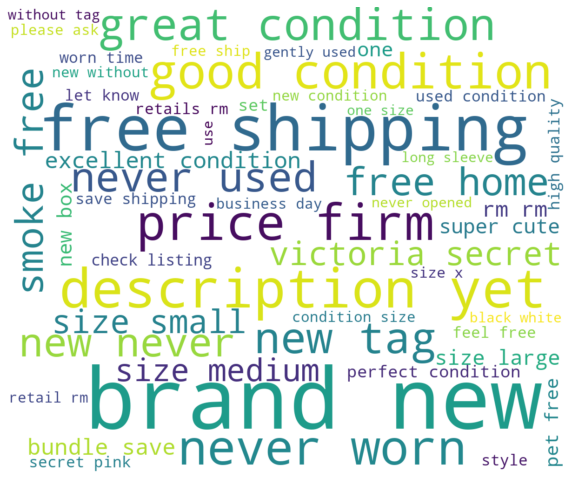

In [56]:
new_words = set(STOPWORDS)

all_text = " ".join(str(item) for item in item_category_df['clean_description'])
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',max_words=50,
                            width=1200,stopwords=new_words ,
                            height=1000).generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
quantile_1_df = item_category_df[item_category_df['price']  < item_category_df['price'].quantile(.25)]
quantile_2_df = item_category_df[(item_category_df['price'] >= item_category_df['price'].quantile(.25)) & (item_category_df['price'] < item_category_df['price'].quantile(.5))]
quantile_3_df = item_category_df[(item_category_df['price'] >= item_category_df['price'].quantile(.5)) & (item_category_df['price'] < item_category_df['price'].quantile(.75))]
quantile_4_df = item_category_df[item_category_df['price'] >= item_category_df['price'].quantile(.75)]

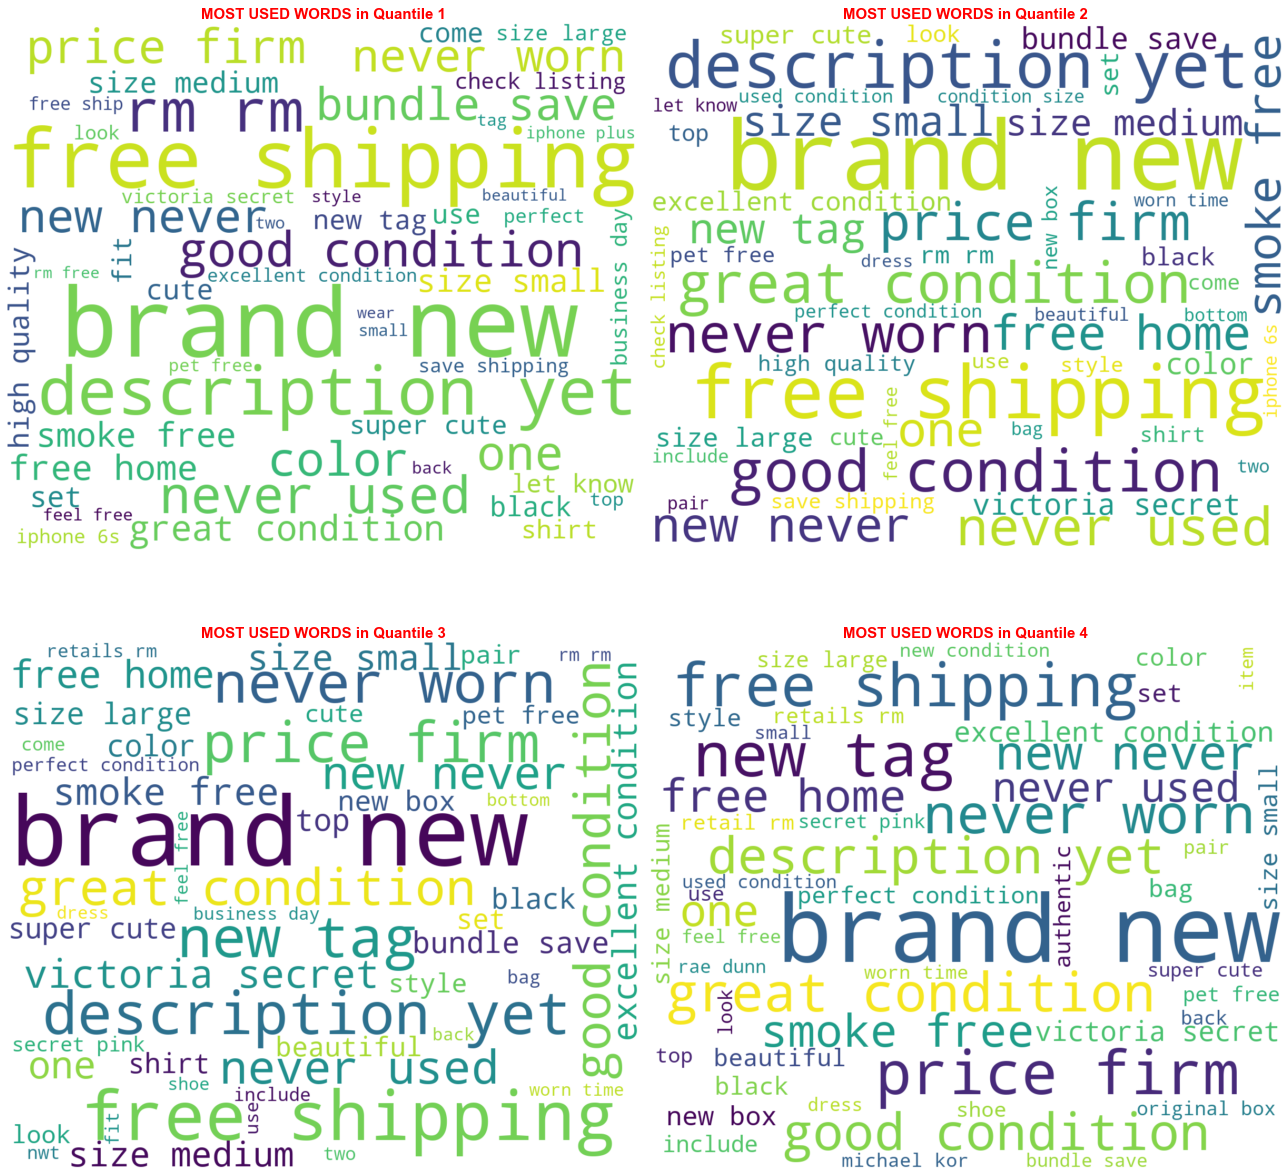

In [58]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(18,18))

plt.subplot(2,2,1);
all_text_q1 = " ".join(str(item) for item in quantile_1_df['clean_description'])
wordcloud = WordCloud(background_color='white',max_words=50,
                            width=1200,stopwords=new_words ,
                            height=1000).generate(all_text_q1)

plt.title("MOST USED WORDS in Quantile 1",fontsize=15,color = 'red', weight="bold")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(2,2,2);
all_text_q2 = " ".join(str(item) for item in quantile_2_df['clean_description'])
wordcloud = WordCloud(background_color='white',max_words=50,
                            width=1200,stopwords=new_words ,
                            height=1000).generate(all_text_q2)

plt.title("MOST USED WORDS in Quantile 2",fontsize=15,color = 'red', weight="bold")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(2,2,3);
all_text_q3 = " ".join(str(item) for item in quantile_3_df['clean_description'])
wordcloud = WordCloud(background_color='white',max_words=50,
                            width=1200,stopwords=new_words ,
                            height=1000).generate(all_text_q3)

plt.title("MOST USED WORDS in Quantile 3",fontsize=15,color = 'red', weight="bold")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(2,2,4);
all_text_q4 = " ".join(str(item) for item in quantile_4_df['clean_description'])
wordcloud = WordCloud(background_color='white',max_words=50,
                            width=1200,stopwords=new_words ,
                            height=1000).generate(all_text_q4)

plt.title("MOST USED WORDS in Quantile 4",fontsize=15,color = 'red', weight="bold")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

# <span style="font-size: 35px;">**Time Series analysis**<a id='TS'></a>

## <span style="font-size: 24px;"> **Q 2.1** <br>

The dataset used here is the New York City Taxi Demand dataset. The raw data is from the<br>
NYC Taxi and Limousine Commission. The data included here consists of aggregating the total<br>
number of taxi passengers into 30 minute buckets. In this question, we will simply process the<br>
data and explore the time series.<br><br>
• Create two new dataframes df_day and df_hour by aggregating the demand value on<br>
daily and hourly level.<br><br>
• Plot the demand value in two line charts for both df_day and df_hour dataframes.<br><br>
• Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day<br>
dataframe, also find out the p value from adfuller test. Do you think the df_day is stationary<br>
enough (please explain your reasons in comments and report)?


In [59]:
#Intialising the dataframe
nyc_taxi_df = pd.read_csv("D:/Visual Studio Projects/Python/Deakin/SIG 742 - Modern Data Science/Assesment 2/nyc_taxi.csv")
nyc_taxi_df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [60]:
# Convert the 'date' column to datetime
nyc_taxi_df['timestamp'] = pd.to_datetime(nyc_taxi_df['timestamp'])

In [61]:
nyc_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [62]:
df_by_hour = nyc_taxi_df.groupby(pd.Grouper(key='timestamp', freq='H')).sum()
df_by_hour

,value
timestamp,
2014-07-01 00:00:00,18971
2014-07-01 01:00:00,10866
2014-07-01 02:00:00,6693
2014-07-01 03:00:00,4433
2014-07-01 04:00:00,4379
...,...
2015-01-31 19:00:00,56577
2015-01-31 20:00:00,48276
2015-01-31 21:00:00,48389


In [63]:
df_by_day = nyc_taxi_df.groupby(pd.Grouper(key='timestamp', freq='D')).sum()
df_by_day

,value
timestamp,
2014-07-01,745967
2014-07-02,733640
2014-07-03,710142
2014-07-04,552565
2014-07-05,555470
...,...
2015-01-27,232058
2015-01-28,621483
2015-01-29,704935


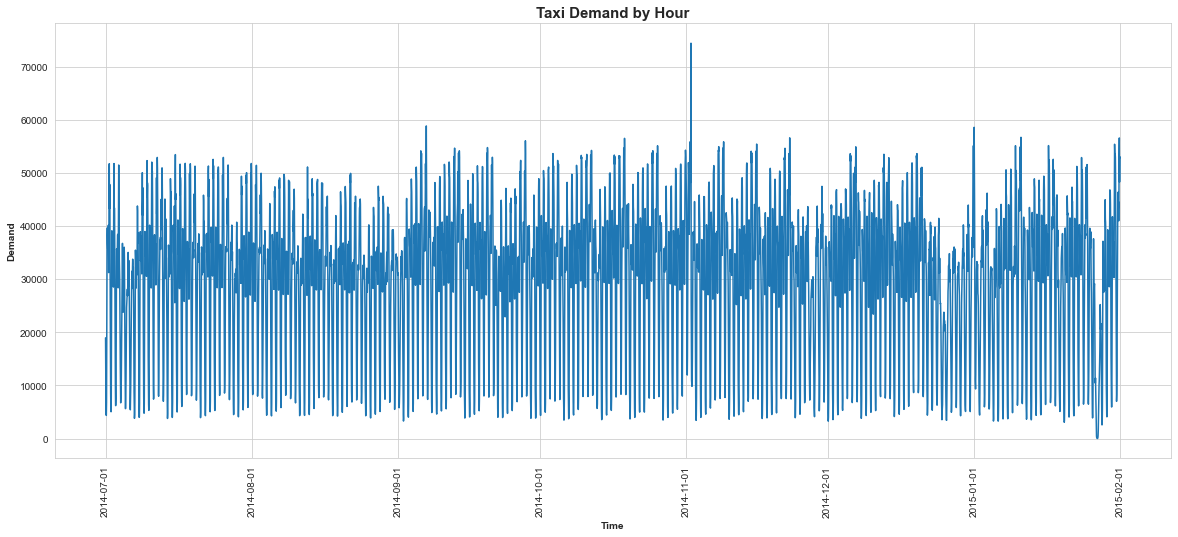

In [64]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))

# Plot
ax.plot(df_by_hour.index.values, df_by_hour['value'])

plt.title("Taxi Demand by Hour", fontsize=15, weight="bold")
plt.xlabel("Time", fontsize=10, weight="bold")
plt.ylabel("Demand", fontsize=10, weight="bold")

# Define the date format
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Set major locator as monthly and minor locator as 12 hourly
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(HourLocator(interval=12))

plt.xticks(rotation=90)
plt.grid(True)

plt.show()

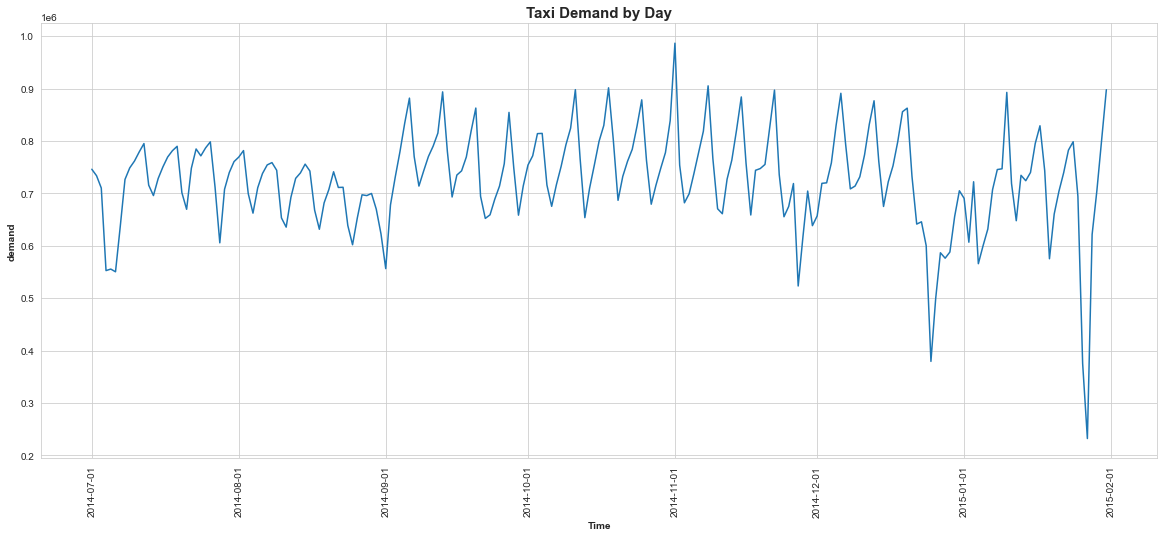

In [65]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))

#plot
ax.plot(df_by_day.index.values,df_by_day['value'])

plt.title("Taxi Demand by Day",fontsize=15, weight="bold")
plt.xlabel("Time",fontsize=10,weight="bold")
plt.ylabel("demand",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.xticks(rotation = 90);

plt.show()

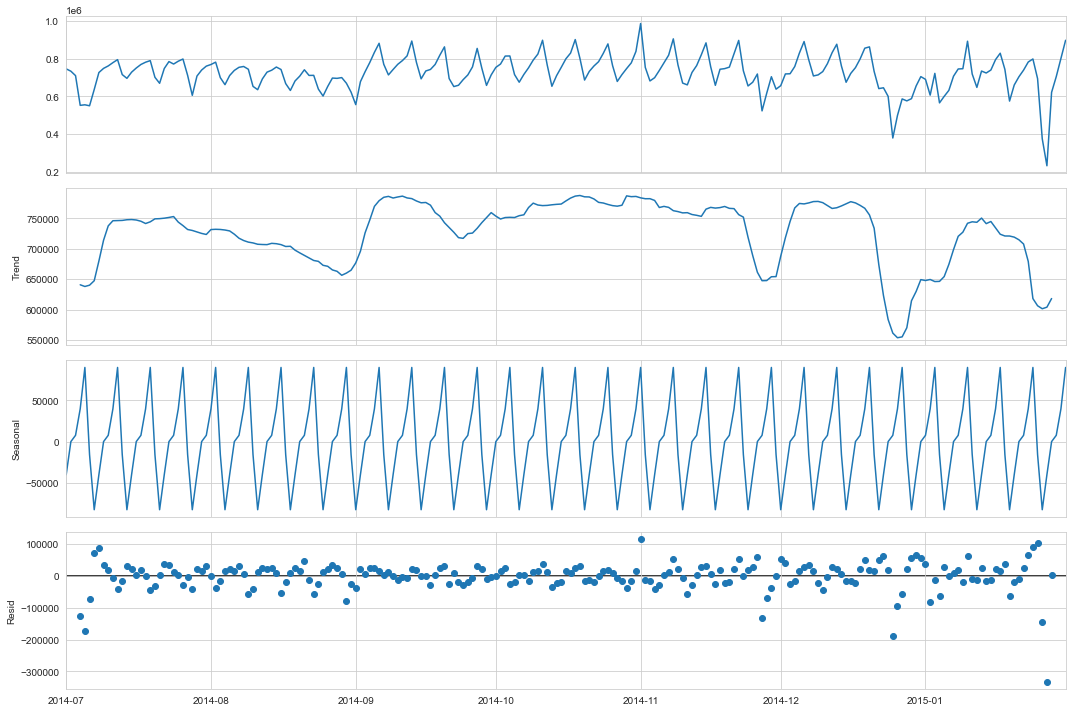

In [66]:
rcParams['figure.figsize'] = 15,10
decomposition_add = seasonal_decompose(df_by_day,model='additive', period = 7)
decomposition_add.plot();

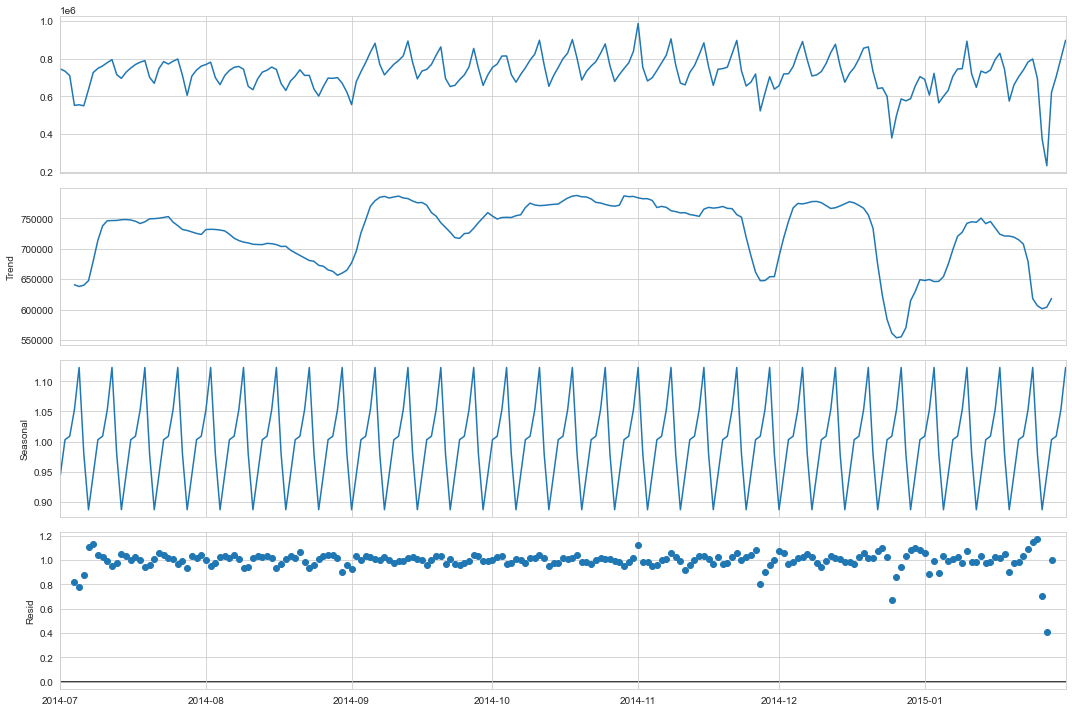

In [67]:
rcParams['figure.figsize'] = 15,10
decomposition_mul = seasonal_decompose(df_by_day,model='multipllicative', period = 7)
decomposition_mul.plot();

In [68]:
## Test for stationarity of the series - Dicky Fuller test
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
    
    if dfoutput['p-value'] < 0.05:
        print ('Given Time Series is stationary')
    else:
        print ('Given Time Series is NOT stationary')

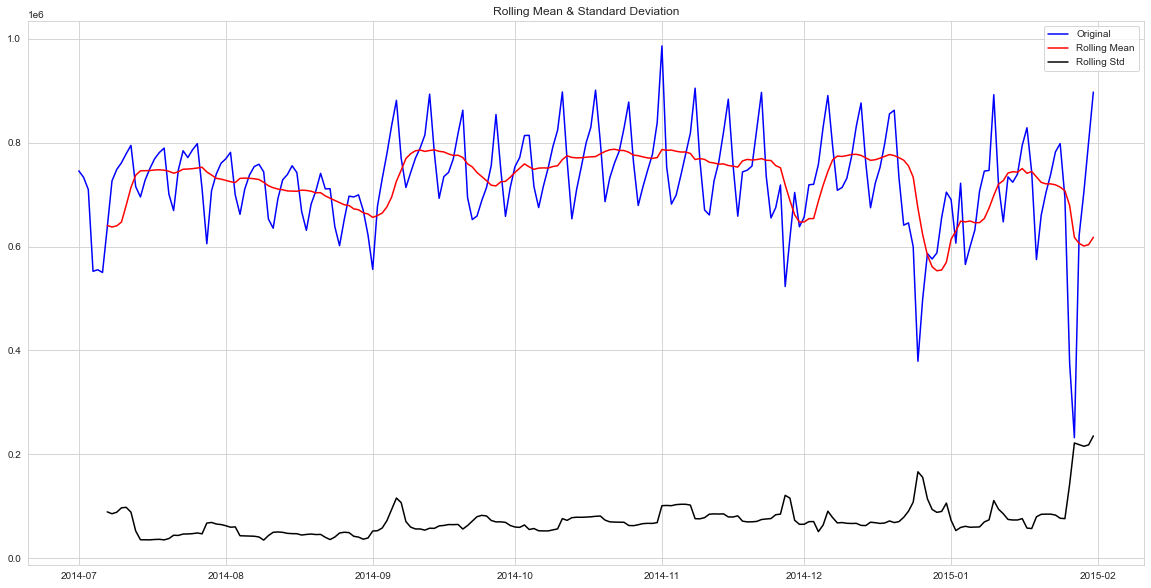

Results of Dickey-Fuller Test:
Test Statistic                  -3.448094
p-value                          0.009425
#Lags Used                       9.000000
Number of Observations Used    205.000000
Critical Value (1%)             -3.462658
Critical Value (5%)             -2.875744
Critical Value (10%)            -2.574341
dtype: float64 

Given Time Series is stationary


In [69]:
rcParams['figure.figsize'] = 20,10
test_stationarity(df_by_day['value'])

## <span style="font-size: 24px;"> **Q 2.2** <br>

In this question, we will try to use time series model such as ARIMA and others to build the<br>
model(s) for forecasting the future.<br><br>
• Create the acf and pacf plots for df_day dataframe.<br><br>
• Find the best model with different parameters on ARIMA model. The parameter range for<br>
p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean<br>
Abosulate Error from 27 choices based on the time from ”Jul-01-2014” to ”Dec-01-2014”.<br><br>
• Using the best model in above steps to forecast the time from ”Jan-01-2015” to<br>
”Jan-31-2015”. Plot the predicted value and the true demand value from ”Jan-01-2015” to<br>
”Jan-31-2015”.<br><br>
• Could you think of any other model (not as same as ARIMA) could do the forecasting for<br>
demand value from ”Jan-01-2015” to ”Jan-31-2015”? You could choose one model<br>
(except ARIMA) and train the model based on the demand value from ”Jul-01-2014” to<br>
”Dec-01-2014” (same training data as the ARIMA). Hint: there are some resources<br>
regarding other time series forecasting models such as prophet here and also the<br>
exponential smoothing here

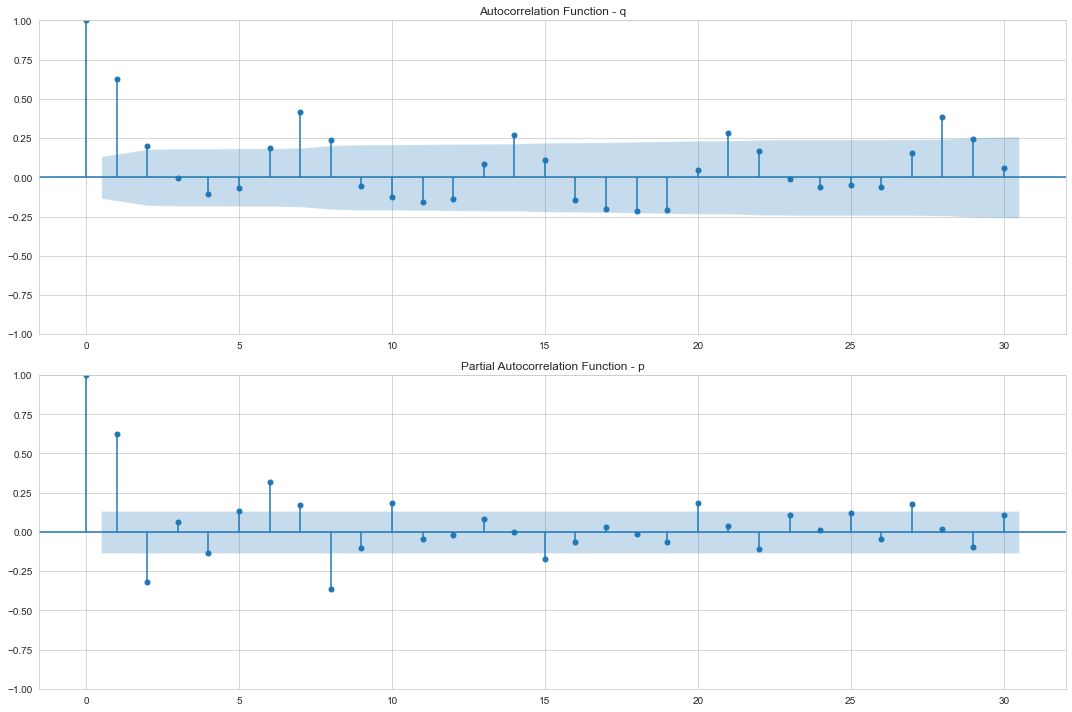

In [70]:
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot ACF
plot_acf(df_by_day['value'], lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function - q')

# Plot PACF
plot_pacf(df_by_day['value'], lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function - p')

# Show plot
plt.tight_layout()
plt.show()

In [71]:
train_ts = df_by_day[df_by_day.index < '2014-12-01']
test_ts = df_by_day[df_by_day.index >= '2015-01-01']

In [72]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2

import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 2, 0)
Model: (0, 2, 1)
Model: (0, 2, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 2, 0)
Model: (1, 2, 1)
Model: (1, 2, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 2, 0)
Model: (2, 2, 1)
Model: (2, 2, 2)


In [73]:
# Creating an empty Dataframe with column names only
results_df = pd.DataFrame(columns=['param', 'AIC', 'RMSE', 'MAPE'])

for param in pdq:
    ARIMA_model = ARIMA(train_ts['value'].values, order=param).fit()
    
    # Calculate RMSE
    predictions = ARIMA_model.predict()
    rmse = sqrt(mean_squared_error(train_ts['value'].values, predictions))
    
    # Calculate MAP
    map_error = np.mean(np.abs((train_ts['value'].values - predictions) / train_ts['value'].values)) * 100
    
    results_df = results_df.append({
        'param': param, 
        'AIC': ARIMA_model.aic,
        'RMSE': rmse,
        'MAPE': map_error
    }, ignore_index=True)



In [74]:
# Sort the dataframe by AIC values in ascending order
results_df = results_df.sort_values(by='MAPE', ascending=True)
results_df

,param,AIC,RMSE,MAPE
19,"(2, 0, 1)",3791.050482,56102.043643,5.789621
2,"(0, 0, 2)",3788.222455,55900.501320,5.820820
18,"(2, 0, 0)",3791.098046,56489.975282,5.833000
10,"(1, 0, 1)",3790.364223,56363.366074,5.905255
20,"(2, 0, 2)",3787.192049,55102.659647,5.914107
11,"(1, 0, 2)",3787.807998,55526.046970,5.968419
1,"(0, 0, 1)",3796.133843,57874.782256,6.004911
23,"(2, 1, 2)",3766.352903,81610.762886,6.140459
9,"(1, 0, 0)",3809.717176,60481.823567,6.669490
22,"(2, 1, 1)",3787.223496,85417.212169,6.986868


**Best parameters it seems is (2,0,1)**

In [75]:
#Generate Model and predictions for best aparameters
best_ARIMA_model = ARIMA(train_ts.values, order=(2,0,1)).fit()
best_predictions = best_ARIMA_model.predict(start=0, end=len(test_ts)-1)

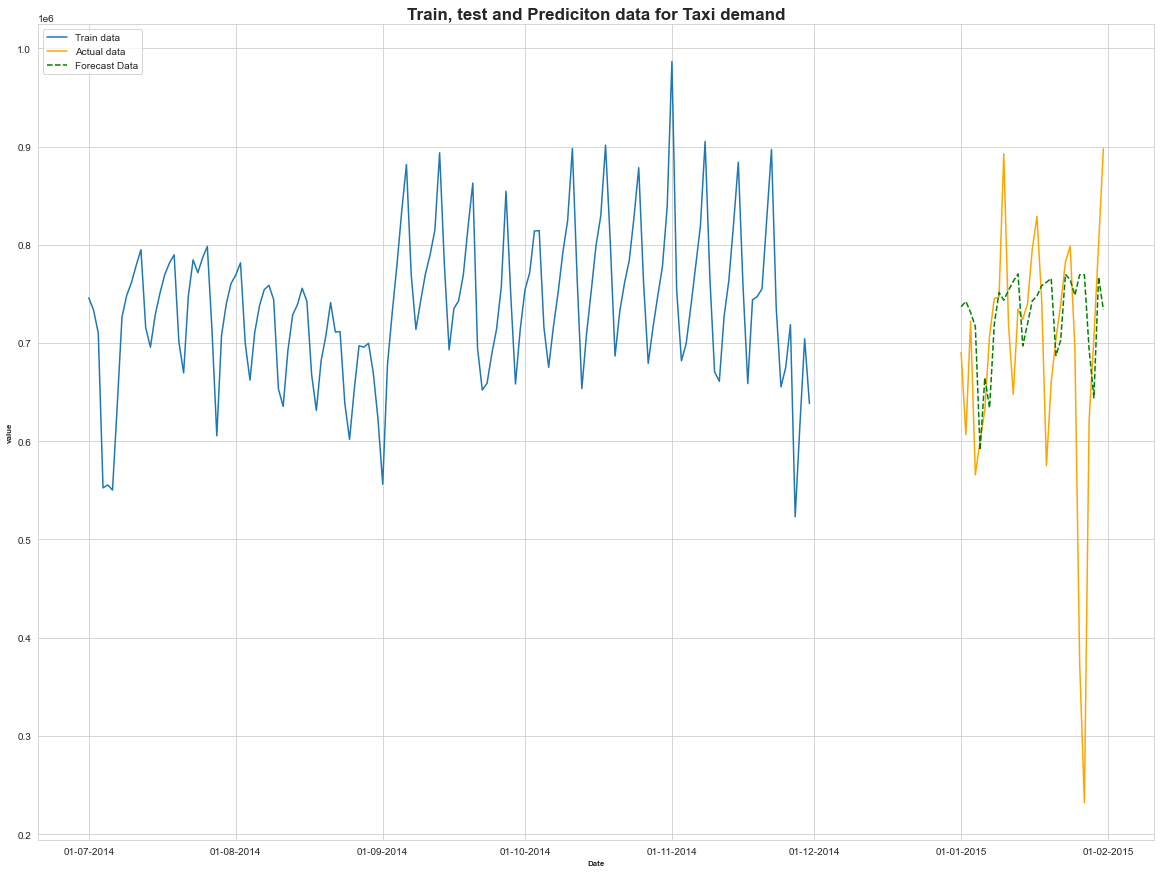

In [76]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 15))

# Add x-axis and y-axis
ax.plot(train_ts.index,train_ts['value'])
ax.plot(test_ts.index.values,test_ts['value'],'orange')
ax.plot(test_ts.index.values,best_predictions,'g--')

# Set title and labels for axes
plt.legend(['Train data', 'Actual data','Forecast Data'],loc="upper left")
plt.title("Train, test and Prediciton data for Taxi demand",fontsize=17, weight="bold")
plt.xlabel("Date",fontsize=8,weight="bold")
plt.ylabel(f"{'value'}",fontsize=8,weight="bold")

# Define the date format
date_form = DateFormatter("%d-%m-%Y")
ax.xaxis.set_major_formatter(date_form)

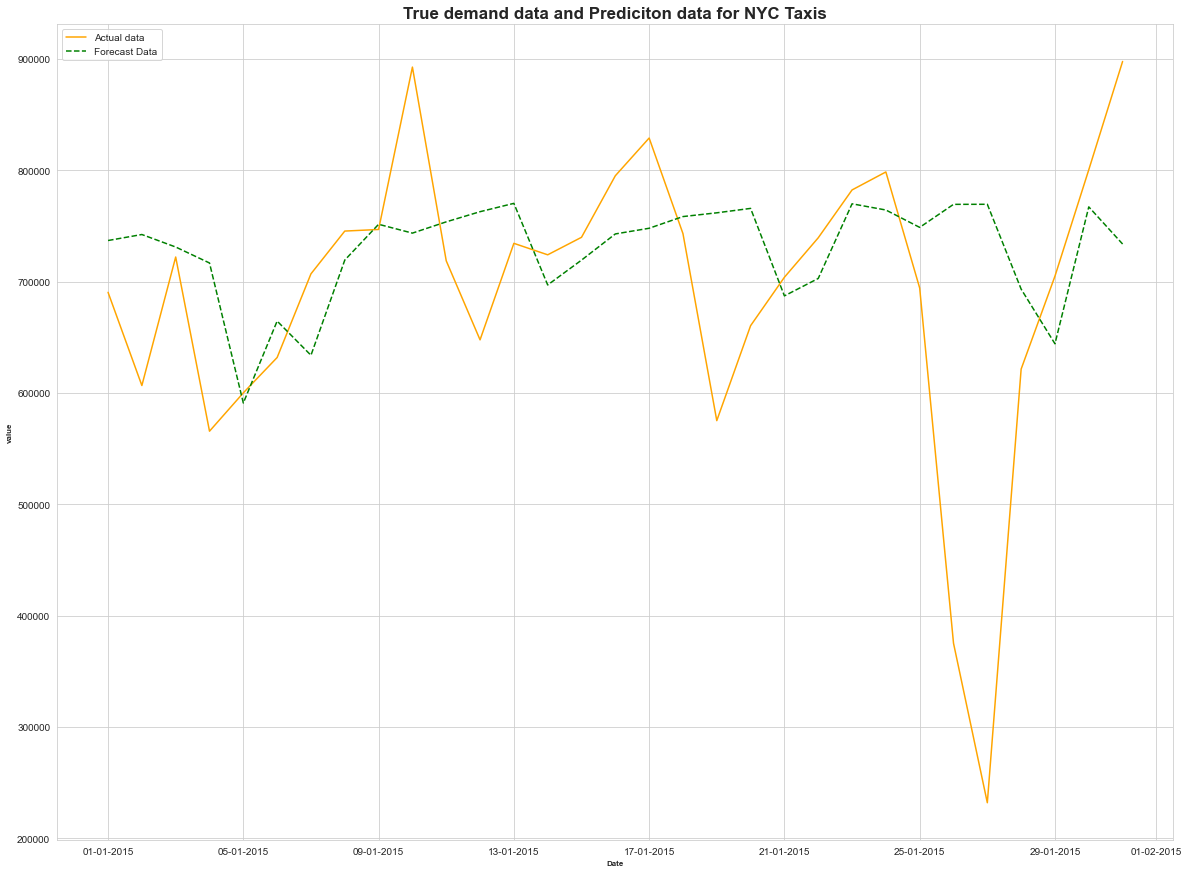

In [77]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 15))

# Add x-axis and y-axis
ax.plot(test_ts.index.values,test_ts['value'],'orange')
ax.plot(test_ts.index.values,best_predictions,'g--')

# Set title and labels for axes
plt.legend(['Actual data','Forecast Data'],loc="upper left")
plt.title("True demand data and Prediciton data for NYC Taxis",fontsize=17, weight="bold")
plt.xlabel("Date",fontsize=8,weight="bold")
plt.ylabel(f"{'value'}",fontsize=8,weight="bold")

# Define the date format
date_form = DateFormatter("%d-%m-%Y")
ax.xaxis.set_major_formatter(date_form)

**We will also try Exponential Smoothing**

In [78]:
# Initializing the Double Exponential Smoothing Model
by_day_model_TES = ExponentialSmoothing(train_ts,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
by_day_model_TES = by_day_model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(by_day_model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6767857142180358, 'smoothing_trend': 0.029425465832624224, 'smoothing_seasonal': 0.3232142857819642, 'damping_trend': nan, 'initial_level': 608718.6286050155, 'initial_trend': 15432.942758019695, 'initial_seasons': array([ 7.37999106, 17.29220152, 25.60171076,  9.07176253,  1.02820033,
        0.93953127,  0.91674131]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [79]:
# Forecasting using this model for the duration of the test set
TES_predict =  by_day_model_TES.forecast(len(test_ts))
TES_predict

2014-12-01    535180.188924
2014-12-02    565576.265719
2014-12-03    604011.125482
2014-12-04    573120.432906
2014-12-05    675198.976772
2014-12-06    740438.367022
2014-12-07    588551.855492
2014-12-08    514072.783977
2014-12-09    543143.654145
2014-12-10    579917.542526
2014-12-11    550128.036629
2014-12-12    647955.264975
2014-12-13    710389.091600
2014-12-14    564527.319470
2014-12-15    492965.379030
2014-12-16    520711.042572
2014-12-17    555823.959569
2014-12-18    527135.640352
2014-12-19    620711.553177
2014-12-20    680339.816178
2014-12-21    540502.783449
2014-12-22    471857.974082
2014-12-23    498278.430999
2014-12-24    531730.376612
2014-12-25    504143.244075
2014-12-26    593467.841380
2014-12-27    650290.540756
2014-12-28    516478.247428
2014-12-29    450750.569135
2014-12-30    475845.819425
2014-12-31    507636.793655
Freq: D, dtype: float64

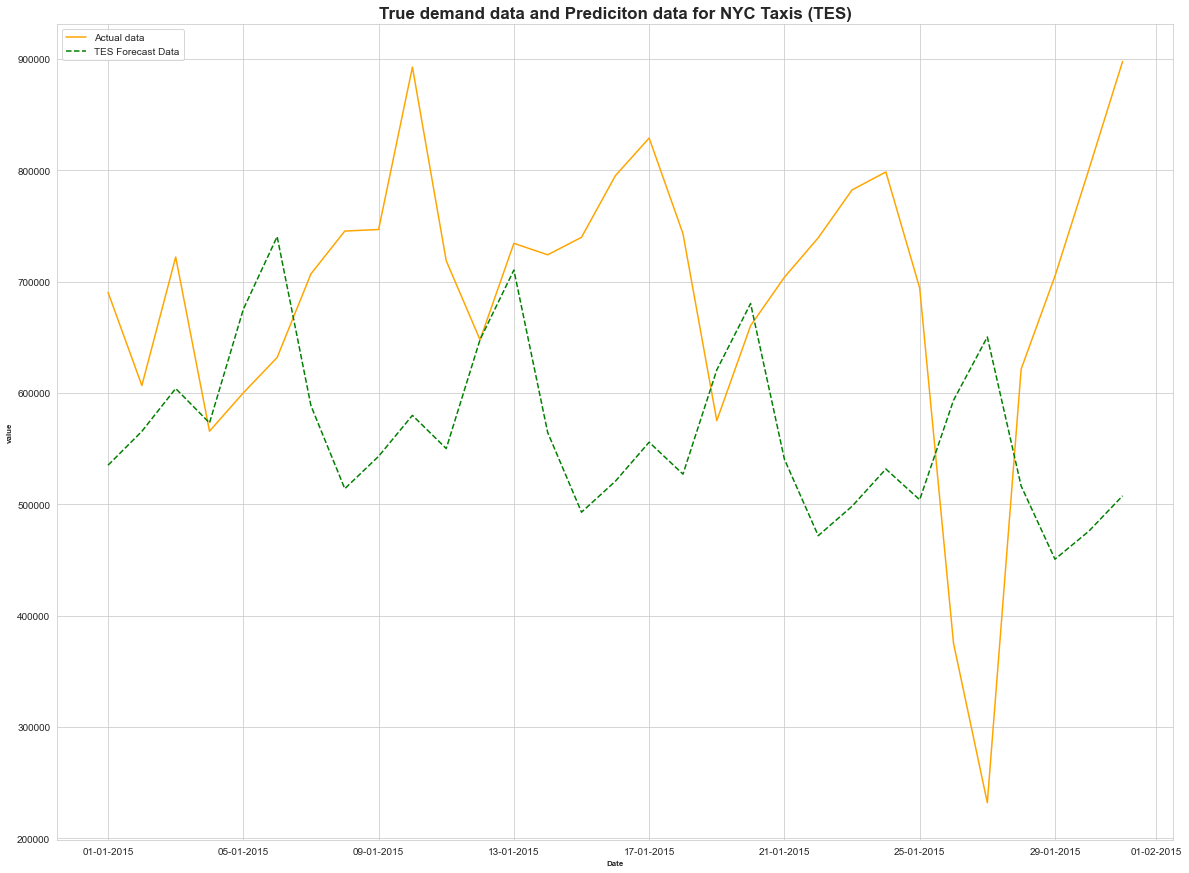

In [80]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 15))

# Add x-axis and y-axis
ax.plot(test_ts.index.values,test_ts['value'],'orange')
ax.plot(test_ts.index.values,TES_predict,'g--')

# Set title and labels for axes
plt.legend(['Actual data','TES Forecast Data'],loc="upper left")
plt.title("True demand data and Prediciton data for NYC Taxis (TES)",fontsize=17, weight="bold")
plt.xlabel("Date",fontsize=8,weight="bold")
plt.ylabel(f"{'value'}",fontsize=8,weight="bold")

# Define the date format
date_form = DateFormatter("%d-%m-%Y")
ax.xaxis.set_major_formatter(date_form)

## <span style="font-size: 24px;"> **Q 2.3** <br>

In this question, we will detect the anomaly within the df_day dataframe.<br><br>
• Create the Weekday column according to the timestamp column in df_day dataframe. The<br>
value in Weekday column should be from [’Monday’, ’Tuesday’, ’Wednesday’,<br>
’Thursday’,’Friday’, ’Saturday’, ’Sunday’]. Also create the Hour, Day, Month, Year,<br>
Month_day (numeric format on day of the month), Lag (yesterday’s demand value ), and<br>
Rolling_Mean (rolling 7 days mean demand value, minimized period is 1) 7 new columns<br>
in df_day dataframe according to the timestamp column.<br><br>
• Using Isolation Forest with above crafted features in df_day to find out the date which is<br>
identified as ’outlier’.

In [81]:
# Create additional columns and utilise datetime funtions to get required outputs
df_by_day['Weekday'] = df_by_day.index.day_name()
df_by_day['Hour'] = df_by_day.index.hour
df_by_day['Day'] = df_by_day.index.day
df_by_day['Month'] = df_by_day.index.month
df_by_day['Year'] = df_by_day.index.year
df_by_day['Month_day'] = df_by_day.index.day
df_by_day['Lag'] = df_by_day['value'].shift(1)
df_by_day['Rolling_Mean'] = df_by_day['value'].rolling(window=7, min_periods=1).mean()

# Handle NaN after creating lag feature
df_by_day = df_by_day.dropna()

# Prepare features for isolation forst model
features = df_by_day[['value', 'Hour', 'Day', 'Month', 'Year', 'Month_day', 'Lag', 'Rolling_Mean']]
df_by_day

,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean
timestamp,,,,,,,,,
2014-07-02,733640,Wednesday,0,2,7,2014,2,745967.0,739803.500000
2014-07-03,710142,Thursday,0,3,7,2014,3,733640.0,729916.333333
2014-07-04,552565,Friday,0,4,7,2014,4,710142.0,685578.500000
2014-07-05,555470,Saturday,0,5,7,2014,5,552565.0,659556.800000
2014-07-06,550285,Sunday,0,6,7,2014,6,555470.0,641344.833333
...,...,...,...,...,...,...,...,...,...
2015-01-27,232058,Tuesday,0,27,1,2015,27,375311.0,617971.285714
2015-01-28,621483,Wednesday,0,28,1,2015,28,232058.0,606190.857143
2015-01-29,704935,Thursday,0,29,1,2015,29,621483.0,601270.714286


DatetimeIndex(['2014-12-25', '2014-12-26', '2014-12-31', '2015-01-01',
               '2015-01-02', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', name='timestamp', freq=None)


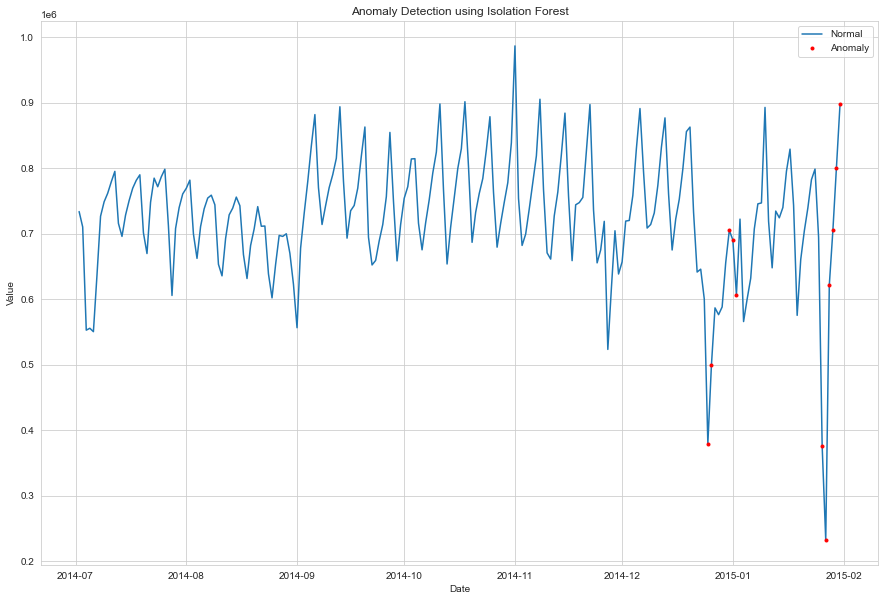

In [82]:
# Train Isolation Forest model
model = IsolationForest(contamination=0.05)
df_by_day['anomaly'] = model.fit_predict(features)

# Print the dates identified as anomolies
print(df_by_day[df_by_day['anomaly'] == -1].index)

# Plot the anamolies
plt.figure(figsize=(15,10))
plt.plot(df_by_day.index, df_by_day['value'], label='Normal')
plt.plot(df_by_day[df_by_day['anomaly'] == -1].index, 
         df_by_day[df_by_day['anomaly'] == -1]['value'], 'r.', label='Anomaly')
plt.legend()
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()